# ¿Que más se podría hacer?

- Test con data augmentation y la LSTM
- Usar los tokenizadores usados en los transformers para ver como funcionan
- TSNE de embeddings y analizar si hay interpretación
- Probar con otras encimas o proteinas
- Usar los embeddings entrenados para analizar resultados de proteinas o encimas con menos data
- Entrenar una red neuronal con los features (fingerprints por ejemplo) y comparar los resultados con los embeddings


# Tome cualquiera de estas propuestas o alguna suya y desarrolle

# Elección: Test con data augmentation y la LSTM

## Preparacion e inicializacion

In [155]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import backend as K
from datagen import smiles_dict
import pandas as pd

In [156]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [157]:
tk = Tokenizer(char_level=True, lower=False)
tk.fit_on_texts(df['canonical_smiles'])
tk.word_index

{'c': 1,
 'C': 2,
 '(': 3,
 ')': 4,
 '1': 5,
 'O': 6,
 '2': 7,
 'N': 8,
 '=': 9,
 '3': 10,
 '[': 11,
 ']': 12,
 'n': 13,
 '@': 14,
 '4': 15,
 'H': 16,
 '-': 17,
 '/': 18,
 'l': 19,
 '.': 20,
 '+': 21,
 'F': 22,
 '5': 23,
 'o': 24,
 'B': 25,
 'r': 26,
 'S': 27,
 '\\': 28,
 '#': 29,
 's': 30,
 '6': 31,
 'I': 32,
 'e': 33,
 'P': 34,
 '7': 35,
 '8': 36,
 'i': 37,
 'a': 38}

In [158]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Levanta modelos y Transforma

In [159]:
figname = "per3-default"

tsne = TSNE(2, verbose=1)
#tsne = TSNE(perplexity = 100,learning_rate = 5000)

In [160]:
model_lstm_file = '005/003-embed_0.68.h5'
model_cnn_file = '005/004-embed-0.69.h5'

model_lstm = load_model(model_lstm_file, custom_objects={'R2': R2})
model_cnn = load_model(model_cnn_file, custom_objects={'R2': R2})

In [161]:
print(model_lstm.layers[0].name)
print(model_cnn.layers[1].name)

embedding_3
embedding


In [162]:
#LSTM
embeddings_lstm = model_lstm.layers[0].get_weights()[0][1:]
X_2d_lstm = tsne.fit_transform(embeddings_lstm)
embeddings_lstm.shape

[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 38 samples in 0.000s...
[t-SNE] Computed neighbors for 38 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 4.839122


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.344662
[t-SNE] KL divergence after 1000 iterations: 0.462590


(38, 128)

In [163]:
#CNN
embeddings_cnn = model_cnn.layers[1].get_weights()[0][1:]
X_2d_cnn = tsne.fit_transform(embeddings_cnn)
embeddings_cnn.shape

[t-SNE] Computing 41 nearest neighbors...
[t-SNE] Indexed 42 samples in 0.000s...
[t-SNE] Computed neighbors for 42 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 42 / 42
[t-SNE] Mean sigma: 0.678992


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.557575
[t-SNE] KL divergence after 1000 iterations: 0.499369


(42, 128)

In [164]:
lstm_x_values = []
lstm_y_values = []
cnn_x_values = []
cnn_y_values = []

## Grafica

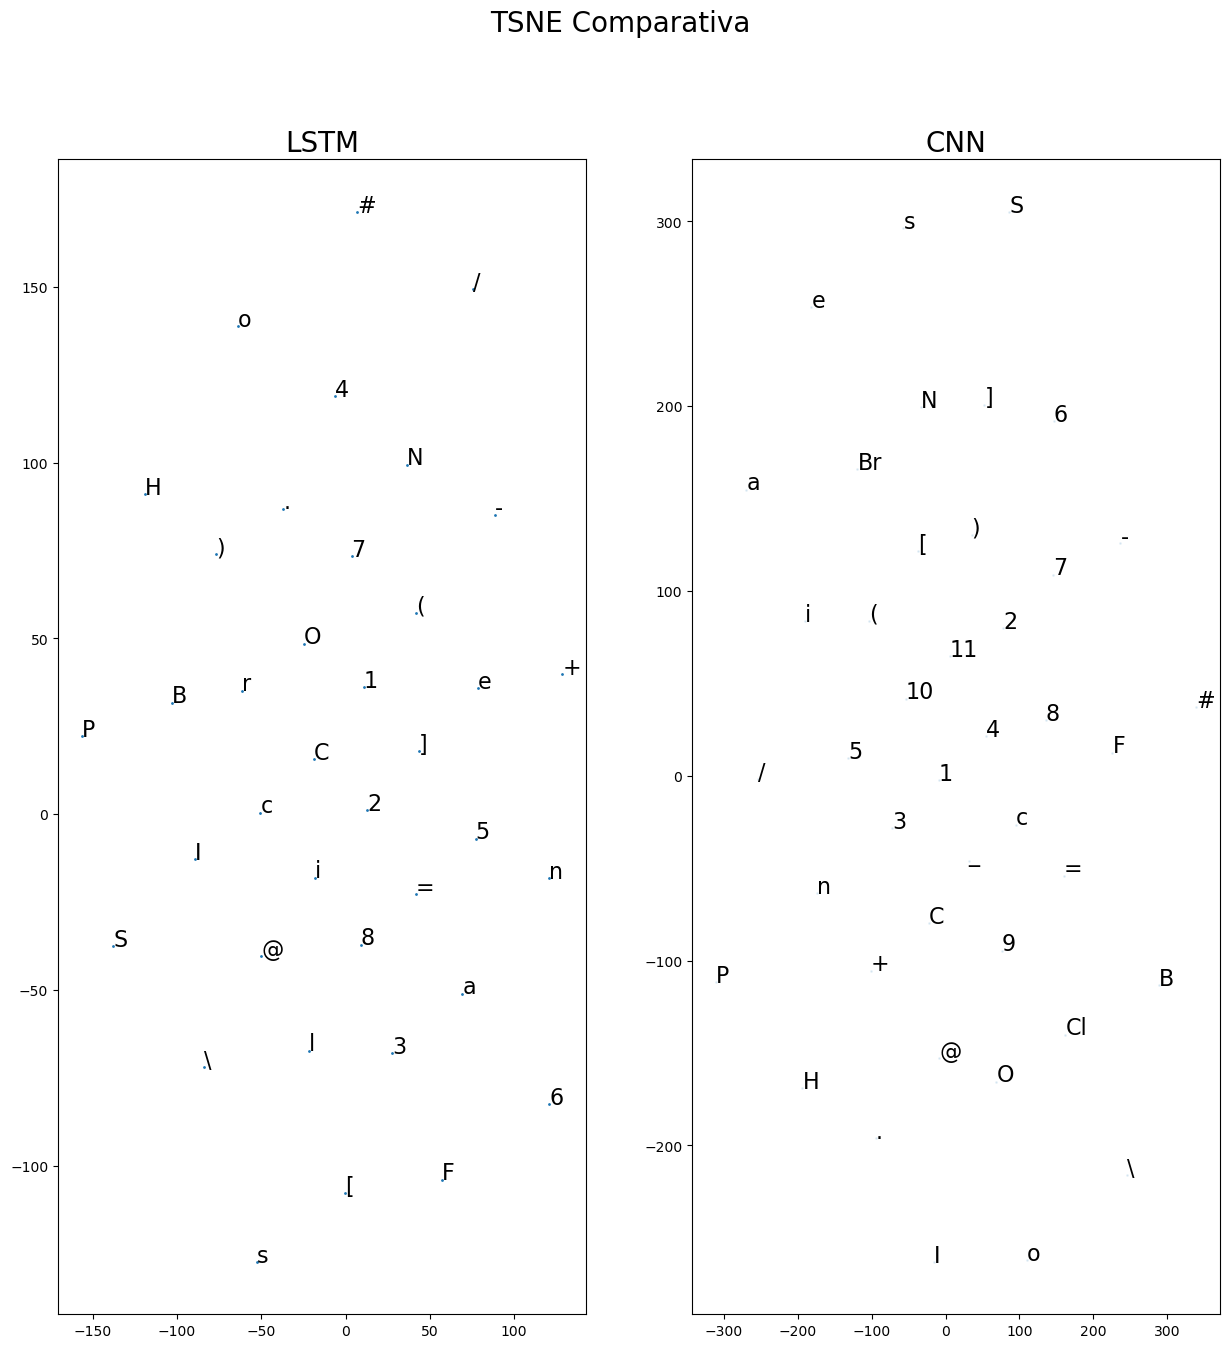

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('TSNE Comparativa', fontsize=20)

ax1.set_title("LSTM", fontsize=20)
ax1.scatter(X_2d_lstm[:, 0], X_2d_lstm[:, 1], s=1)
for i, t in enumerate(tk.word_index):
    lstm_x_values += [t]
    lstm_y_values += [i]
    ax1.text(X_2d_lstm[i, 0], X_2d_lstm[i, 1], t, fontsize=16)


ax2.set_title("CNN", fontsize=20)
ax2.scatter(X_2d_cnn[:, 0], X_2d_cnn[:, 1], s=1, alpha=0.1)
for i, t in enumerate(smiles_dict):
    cnn_x_values += [t]
    cnn_y_values += [i]
    ax2.text(X_2d_cnn[i, 0], X_2d_cnn[i, 1], t, fontsize=16)


In [166]:
len_lstm = len(lstm_x_values)
for i in range(len(cnn_x_values) - len_lstm):
    lstm_x_values += [0]
    lstm_y_values += [0]

df_values = pd.DataFrame(data={'lstm': lstm_x_values, 'cnn': cnn_x_values})
print(df_values)

   lstm cnn
0     c   #
1     C   (
2     (   )
3     )   +
4     1   -
5     O   /
6     2   1
7     N   2
8     =   3
9     3   4
10    [   5
11    ]   6
12    n   7
13    @   8
14    4   =
15    H   C
16    -   F
17    /   H
18    l   I
19    .   N
20    +   O
21    F   P
22    5   S
23    o   [
24    B   \
25    r   ]
26    S   _
27    \   c
28    #  Cl
29    s  Br
30    6   n
31    I   o
32    e   s
33    P   @
34    7   .
35    8   a
36    i   B
37    a   e
38    0   i
39    0   9
40    0  10
41    0  11


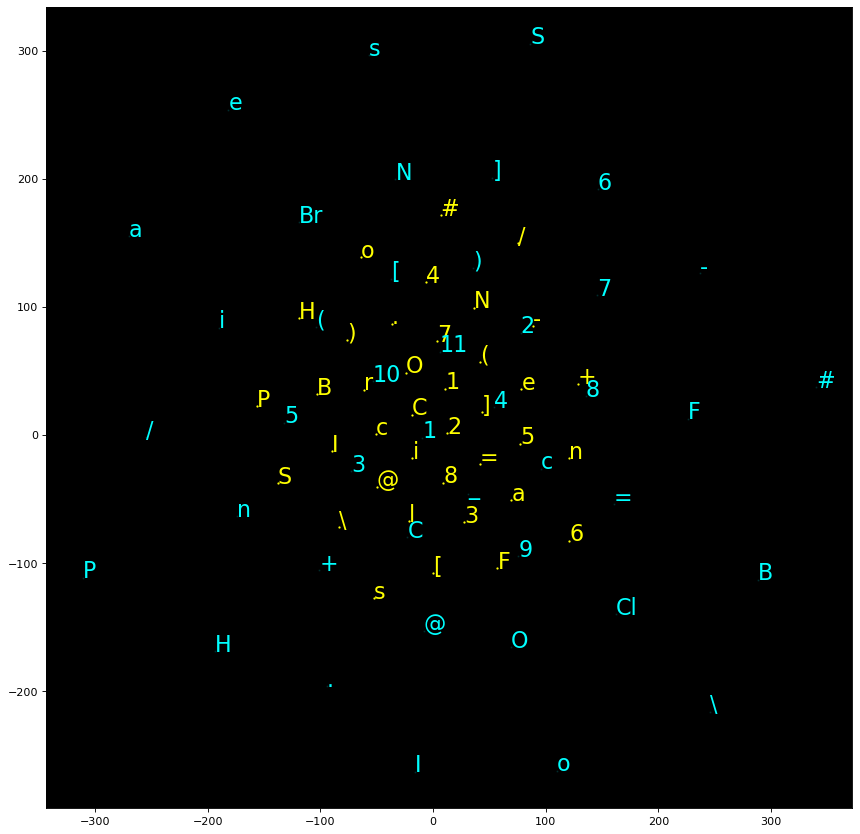

In [167]:
plt.figure(figsize=(13, 13), dpi=80)
plt.axes().set_facecolor(color="black")
plt.scatter(X_2d_lstm[:, 0], X_2d_lstm[:, 1], s=1, c="yellow")
for i, t in enumerate(tk.word_index):
    lstm_x_values += [t]
    lstm_y_values += [i]
    plt.text(X_2d_lstm[i, 0], X_2d_lstm[i, 1], t, fontsize=20, c="yellow")


plt.scatter(X_2d_cnn[:, 0], X_2d_cnn[:, 1], s=1, alpha=0.1, c="cyan")
for i, t in enumerate(smiles_dict):
    cnn_x_values += [t]
    cnn_y_values += [i]
    plt.text(X_2d_cnn[i, 0], X_2d_cnn[i, 1], t, fontsize=20, c="cyan")
#plt.savefig('line_plot.pdf')

plt.savefig("005/" + figname + '.png', bbox_inches='tight')
plt.show()

# TSNE Conclusion

El isotopo 1 se encuentran ceranos en ambos modelos, podría indicar que las moleculas requieren poca cantidad de neutrones
Enlaces triples # se encuentran muy distantes.
La composición de los enlaces dobles / también están distantes

In [168]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 05/02/2023 08:00:39
